In [137]:
import pandas as pd
df = pd.read_csv('train.csv')

In [138]:
df.shape

(891, 12)

In [139]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [140]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [142]:
group=df.groupby('Survived').size()
group

Survived
0    549
1    342
dtype: int64

In [143]:
df.value_counts('Survived', normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

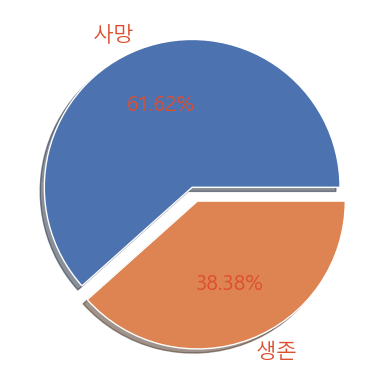

In [144]:
labels = ['사망', '생존']
plt.pie(group.values, labels=labels, autopct='%.2f%%',
         explode=[0.05]*len(group), shadow=True, textprops={'color':"#DD4E2E", 'fontsize':'15'})
plt.show()

In [145]:
import seaborn as sns
sns.set_theme(font='Malgun Gothic', style='dark')


<Axes: title={'center': '성별 생존자 수'}, xlabel='Sex', ylabel='count'>

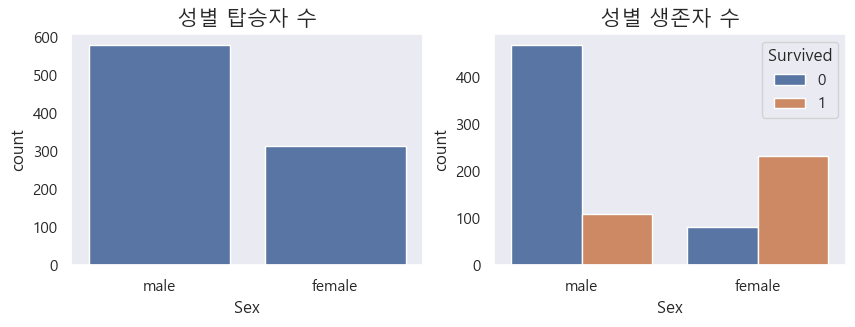

In [146]:
fig, axs =plt.subplots(1, 2, figsize=(10,3))
axs[0].set_title('성별 탑승자 수', size=15)
sns.countplot(x='Sex', data=df, ax=axs[0])

axs[1].set_title('성별 생존자 수', size=15)
sns.countplot(x='Sex', hue='Survived', data=df, ax=axs[1])

In [147]:
#성별 생존율
gender = df.groupby('Sex').size().to_frame('탑승인원')
gender


,탑승인원
Sex,
female,314
male,577


In [148]:
filt = df['Survived'] == 1
gender_survived = df[filt].groupby('Sex').size().to_frame('생존자수')
gender_survived

,생존자수
Sex,
female,233
male,109


In [149]:
join = gender_survived.join(gender)
join['생존율'] = join['생존자수']/join['탑승인원']
join

,생존자수,탑승인원,생존율
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


In [150]:
#탑승 클래스별 생존율
df['Pclass'].unique()

array([3, 1, 2])

<Axes: title={'center': '클래스별 생존자 수'}, xlabel='Pclass', ylabel='count'>

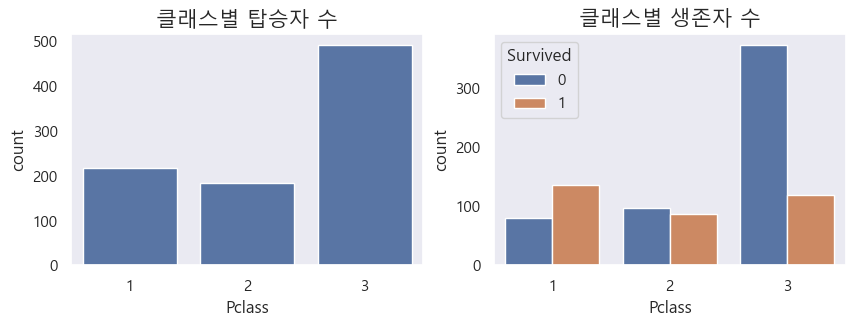

In [151]:
fig, axs =plt.subplots(1, 2, figsize=(10,3))
axs[0].set_title('클래스별 탑승자 수', size=15)
sns.countplot(x='Pclass', data=df, ax=axs[0])

axs[1].set_title('클래스별 생존자 수', size=15)
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axs[1])

In [152]:
pclass = df.groupby('Pclass').size().to_frame('탑승자 수')
pclass

,탑승자 수
Pclass,
1,216
2,184
3,491


In [153]:
filt = df['Survived']==1
pclass_survived = df[filt].groupby('Pclass').size().to_frame('생존자 수')
pclass_survived

,생존자 수
Pclass,
1,136
2,87
3,119


In [154]:
join = pclass.join(pclass_survived)
join['생존율'] = join['생존자 수']/join['탑승자 수']
join

,탑승자 수,생존자 수,생존율
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


In [155]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

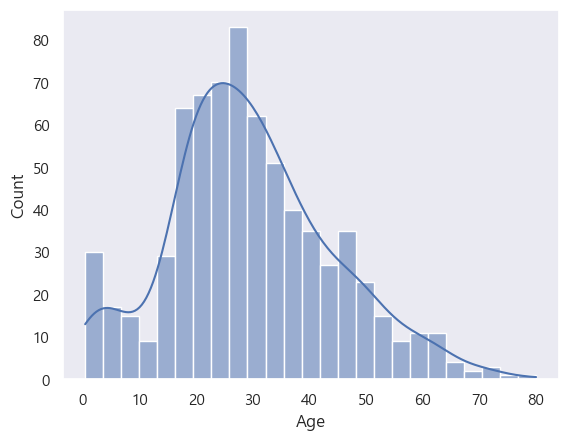

In [156]:
sns.histplot(data=df, x='Age', bins=25, kde=True)
plt.show()

In [157]:
#연령대별 사망자, 생존자 그래프
survived = df[df['Survived']==1]
dead = df[df['Survived']==0]
dead.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


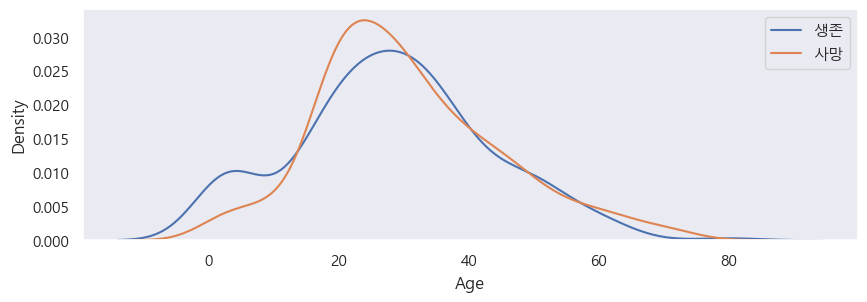

In [158]:
plt.figure(figsize=(10,3))
sns.kdeplot(survived['Age'], label='생존')
sns.kdeplot(dead['Age'], label='사망')
plt.legend()
plt.show()

<Axes: title={'center': '항구별 생존자 수'}, xlabel='Embarked', ylabel='count'>

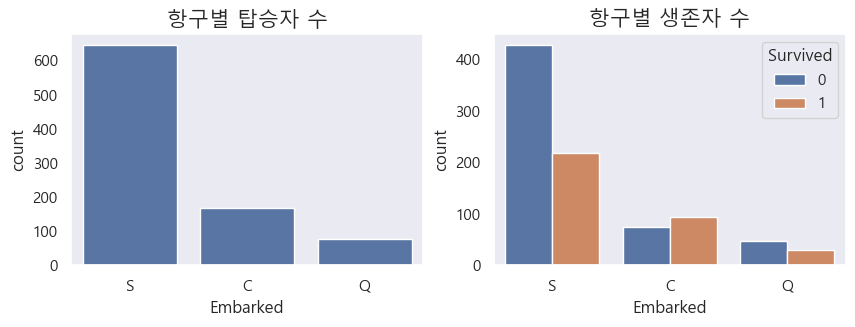

In [159]:
#탑승항구별 생존율
fig, axs =plt.subplots(1, 2, figsize=(10,3))
axs[0].set_title('항구별 탑승자 수', size=15)
sns.countplot(x='Embarked', data=df, ax=axs[0])

axs[1].set_title('항구별 생존자 수', size=15)
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axs[1])

In [ ]:
embarked = df.groupby('Embarked').size().to_frame('탑승자 수')
embarked

,탑승자수
Embarked,
C,168
Q,77
S,644


In [161]:
embarked_survived = df[df['Survived']==1].groupby('Embarked').size().to_frame('생존자 수')
embarked_survived

,생존자 수
Embarked,
C,93
Q,30
S,217


In [163]:
join = embarked.join(embarked_survived)
join['생존율'] = join['생존자 수']/join['탑승자 수']
join

,탑승자 수,생존자 수,생존율
Embarked,,,
C,168,93,0.553571
Q,77,30,0.389610
S,644,217,0.336957


In [171]:
c1 = df[df['Pclass']==1].value_counts('Embarked')
c2 = df[df['Pclass']==2].value_counts('Embarked')
c3 = df[df['Pclass']==3].value_counts('Embarked')
pclass = pd.DataFrame([c1, c2, c3])
pclass.index=['1등급', '2등급', '3등급']
pclass.columns=['S항구', 'C항구', 'Q항구']
pclass

,S항구,C항구,Q항구
1등급,127,85,2
2등급,164,17,3
3등급,353,66,72


<Axes: >

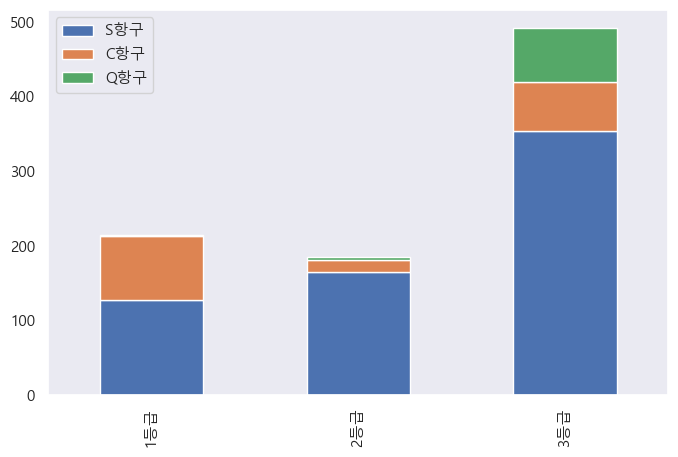

In [174]:
fig, ax = plt.subplots(figsize=(8, 5))
pclass.plot(kind='bar', stacked=True, ax=ax)


In [ ]:
#항구별로 1등급 몇명 2등급3등급 몇명탔는지 출력